In [1]:
from ca_utils import io
from ca_utils.roi import plot
import matplotlib.pyplot as plt
import xarray as xr


plt.style.use('ncb.mplstyle')

## Specify the recording session you want to analyse

In [2]:
data_file = "dat/20240926/20240926_006"
s = io.Session(data_file)
s.log

,"(stimFileName, left sound (ao0))","(stimFileName, right sound (ao1))","(stimFileName, start trigger)","(stimFileName, stop trigger)","(stimFileName, next trigger)","(silencePre, left sound (ao0))","(silencePre, right sound (ao1))","(silencePre, start trigger)","(silencePre, stop trigger)","(silencePre, next trigger)",...,frame_zpos,pixels_zpos,left sound (ao0)_onset_ms,left sound (ao0)_offset_ms,left sound (ao0)_onset_frame,left sound (ao0)_offset_frame,right sound (ao1)_onset_ms,right sound (ao1)_offset_ms,right sound (ao1)_onset_frame,right sound (ao1)_offset_frame
trial,,,,,,,,,,,,,,,,,,,,,
0,pulseTrain_16PDUR_20PPAU_128PNUM_250PCAR.wav,pulseTrain_16PDUR_20PPAU_128PNUM_250PCAR.wav,SI_START,SI_STOP,SI_NEXT,10000,10000,10000,10000,10000,...,"[0.02469032069116858, 0.024982230641324113, 0....",None,10002.4,14585.2,299,436,10002.4,14585.2,299,436
1,pulseTrain_16PDUR_20PPAU_128PNUM_250PCAR.wav,pulseTrain_16PDUR_20PPAU_128PNUM_250PCAR.wav,SI_START,SI_STOP,SI_NEXT,10000,10000,10000,10000,10000,...,"[0.02488679468240494, 0.025028765256519064, 0....",None,10002.1,14585.3,300,437,10002.1,14585.2,300,437
2,pulseTrain_16PDUR_20PPAU_128PNUM_250PCAR.wav,pulseTrain_16PDUR_20PPAU_128PNUM_250PCAR.wav,SI_START,SI_STOP,SI_NEXT,10000,10000,10000,10000,10000,...,"[0.024981240543829577, 0.02490555005936228, 0....",None,10001.2,14585.3,299,437,10001.2,14585.3,299,437


## Define ROIs in the GUI
Executing the next cell will open a GUI window that shows the imaging data, allows you to draw ROIs and preview dF/F traces.

Instructions:
- click on the image to create a square roi
- move the roi by dragging and dropping it in the center
- add more hangles/edges by single clicking on a line
- remove handle by right clicking on a handle
- delete the roi by left clicking in the center

In [4]:
!python -m ca_utils.roi.gui {data_file}

QLayout: Attempting to add QLayout "" to Widget "", which already has a layout
QLayout: Attempting to add QLayout "" to Widget "", which already has a layout
INFO:root:   Parsing protocol file dat/20240926/20240926_006_prot.yml.
INFO:root:Found 4 tif files.
QLayout: Attempting to add QLayout "" to Widget "", which already has a layout
QLayout: Attempting to add QLayout "" to Widget "", which already has a layout
QLayout: Attempting to add QLayout "" to Widget "", which already has a layout
QLayout: Attempting to add QLayout "" to Widget "", which already has a layout
2024-10-09 12:29:29.769 python[66154:1572081] +[IMKClient subclass]: chose IMKClient_Legacy
2024-10-09 12:29:29.769 python[66154:1572081] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


## Load imaging data for first trial

In [3]:
trial = s.stack(trial_number=0)
display(trial.attrs['stim_info'])
trial

,name,onset_seconds,offset_seconds,intensity
left sound (ao0),pulseTrain_16PDUR_20PPAU_128PNUM_250PCAR.wav,10.0024,14.5852,0.5
right sound (ao1),pulseTrain_16PDUR_20PPAU_128PNUM_250PCAR.wav,10.0024,14.5852,0.5


<xarray.DataArray (time: 737, z: 1, x: 512, y: 512, channel: 1)> Size: 386MB
array([[[[[ -88],
          [-169],
          [-100],
          ...,
          [ -72],
          [-117],
          [-136]],

         [[  18],
          [  18],
          [  63],
          ...,
          [-100],
          [ -86],
          [  38]],

         [[  88],
          [  58],
          [  -6],
          ...,
...
          ...,
          [   7],
          [ 238],
          [  74]],

         [[  -7],
          [  49],
          [  81],
          ...,
          [ -33],
          [  12],
          [  84]],

         [[-129],
          [-147],
          [-136],
          ...,
          [ -26],
          [3246],
          [-123]]]]], dtype=int16)
Coordinates:
  * time     (time) float64 6kB 0.0003 0.0332 0.0665 ... 24.48 24.52 24.55
  * channel  (channel) <U5 20B 'gcamp'
Dimensions without coordinates: z, x, y
Attributes: (12/64)
    ('stimFileName', 'left sound (ao0)'):   pulseTrain_16PDUR_20PPAU_128PNUM_...
    ('stimFileName', 'right sound (ao1)'):  pulseTrain_16PDUR_20PPAU_128PNUM_...
    ('stimFileName', 'start trigger'):      SI_START
    ('stimFileName', 'stop trigger'):       SI_STOP
    ('stimFileName', 'next trigger'):       SI_NEXT
    ('silencePre', 'left sound (ao0)'):     10000
    ...                                     ...
    left sound (ao0)_offset_frame:          436
    right sound (ao1)_onset_ms:             10002.4
    right sound (ao1)_offset_ms:            14585.2
    right sound (ao1)_onset_frame:          299
    right sound (ao1)_offset_frame:         436
    stim_info:                                                               ...

## Load ROIs

In [4]:
rois = xr.open_dataset(f"{data_file}_rois.h5")['rois']
rois

<xarray.DataArray 'rois' (z: 1, x: 512, y: 512, roi: 4)> Size: 1MB
[1048576 values with dtype=bool]
Dimensions without coordinates: z, x, y, roi

## Plot ROI shapes

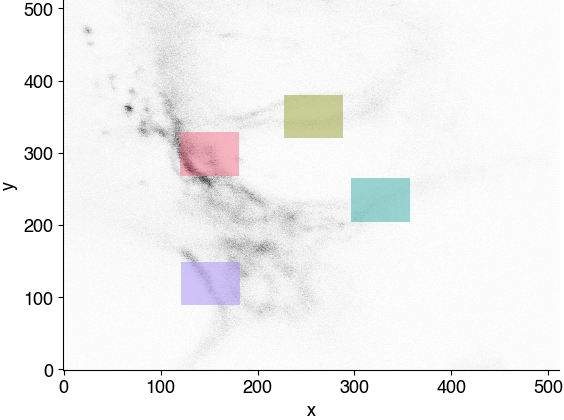

In [5]:
layer = 0  # need to specify a z-layer, use the first layer by default
background = trial.mean(dim='time').sel(channel='gcamp', z=layer)  # compute time averaged frame as background
plot.plot_rois(rois, layer, background)

## Calculate and plot raw fluorescence traces

In [39]:
traces = []
for cnt in range(len(rois.roi)):
    trace = plot.extract_one_trial(trial, rois[..., cnt:cnt+1])
    traces.append(trace)

xr.concat(traces, dim='roi')


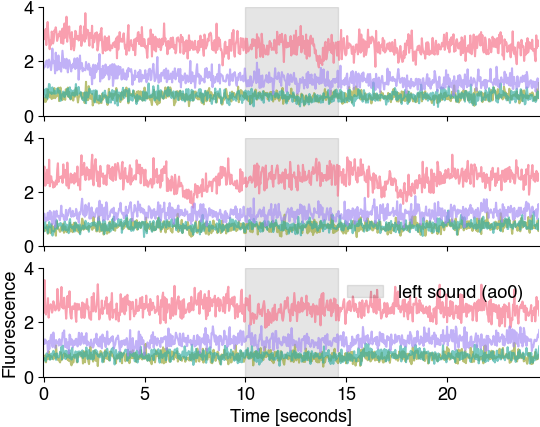

In [7]:
traces = plot.extract_traces(s, rois)


fig, axs = plt.subplots(nrows=s.nb_trials, sharex=True, sharey=True)

which_stim = 'left sound (ao0)'
for trial_number in range(s.nb_trials):
    trace = traces[trial_number].sel(channel='gcamp')
    stim_info = trace.attrs['stim_info']
    time = traces[trial_number].time
    axs[trial_number].plot(time, trace, alpha=0.67)
    axs[trial_number].axvspan(stim_info.loc[which_stim]['onset_seconds'],
                              stim_info.loc[which_stim]['offset_seconds'],
                              color='k', alpha=0.1, label=which_stim)
    axs[trial_number].set_xlim(time[0], time[-1])
axs[trial_number].set_xlabel('Time [seconds]')
axs[trial_number].set_ylabel('Fluorescence')
axs[trial_number].legend()
plt.show()

## Calculate and plot dF/F

<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\D'
/var/folders/bc/5m_c7nkj1vnc2w7xmmnhpfww0000gn/T/ipykernel_14066/2834557922.py:16: SyntaxWarning: invalid escape sequence '\D'
  axs[trial_number].set_ylabel('$\Delta$F/F')


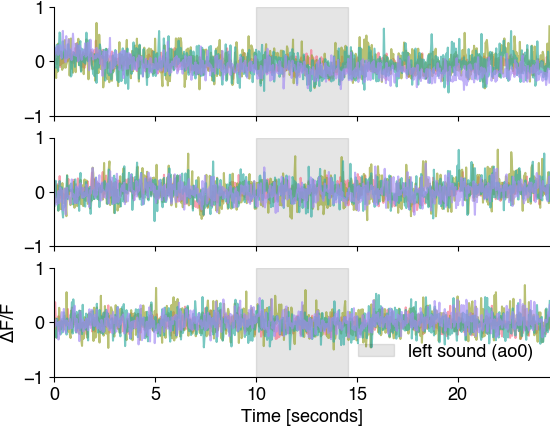

In [8]:
traces_dff = plot.dff(traces, f0_seconds=(0, 10))

fig, axs = plt.subplots(nrows=s.nb_trials, sharex=True, sharey=True)

which_stim = 'left sound (ao0)'
for trial_number in range(s.nb_trials):
    trace = traces_dff[trial_number].sel(channel='gcamp')
    stim_info = trace.attrs['stim_info']
    time = traces[trial_number].time
    axs[trial_number].plot(time, trace, alpha=0.67)
    axs[trial_number].axvspan(stim_info.loc[which_stim]['onset_seconds'],
                              stim_info.loc[which_stim]['offset_seconds'],
                              color='k', alpha=0.1, label=which_stim)
    axs[trial_number].set_xlim(time[0], time[-1])
axs[trial_number].set_xlabel('Time [seconds]')
axs[trial_number].set_ylabel('$\Delta$F/F')
axs[trial_number].legend()
plt.show()

<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\D'
/var/folders/bc/5m_c7nkj1vnc2w7xmmnhpfww0000gn/T/ipykernel_14066/1873383448.py:16: SyntaxWarning: invalid escape sequence '\D'
  axs[trial_number].set_ylabel('$\Delta$F/F')


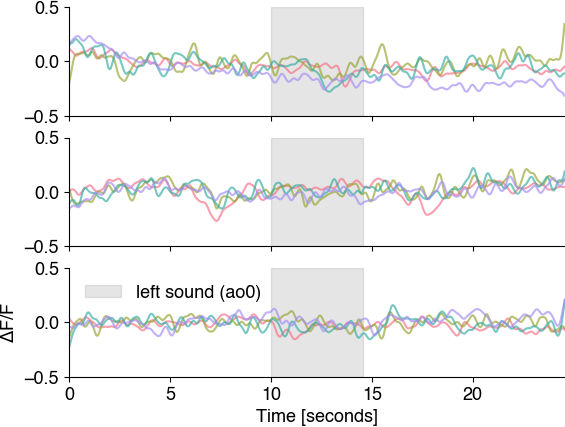

In [9]:
traces_smooth = plot.smooth(traces_dff, sigma=4)

fig, axs = plt.subplots(nrows=s.nb_trials, sharex=True, sharey=True)

which_stim = 'left sound (ao0)'
for trial_number in range(s.nb_trials):
    trace = traces_smooth[trial_number].sel(channel='gcamp')
    stim_info = trace.attrs['stim_info']
    time = traces[trial_number].time
    axs[trial_number].plot(time, trace, alpha=0.67)
    axs[trial_number].axvspan(stim_info.loc[which_stim]['onset_seconds'],
                              stim_info.loc[which_stim]['offset_seconds'],
                              color='k', alpha=0.1, label=which_stim)
    axs[trial_number].set_xlim(time[0], time[-1])
axs[trial_number].set_xlabel('Time [seconds]')
axs[trial_number].set_ylabel('$\Delta$F/F')
axs[trial_number].legend()
plt.show()




## Alternative way of plotting the stimulus

<>:26: SyntaxWarning: invalid escape sequence '\D'
<>:26: SyntaxWarning: invalid escape sequence '\D'
/var/folders/bc/5m_c7nkj1vnc2w7xmmnhpfww0000gn/T/ipykernel_14066/84448574.py:26: SyntaxWarning: invalid escape sequence '\D'
  axs[trial_number * 2 + 1].set_ylabel('$\Delta$F/F')
/var/folders/bc/5m_c7nkj1vnc2w7xmmnhpfww0000gn/T/ipykernel_14066/84448574.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[trial_number * 2 + 1].legend()


left sound (ao0)
right sound (ao1)
left sound (ao0)
right sound (ao1)
left sound (ao0)
right sound (ao1)


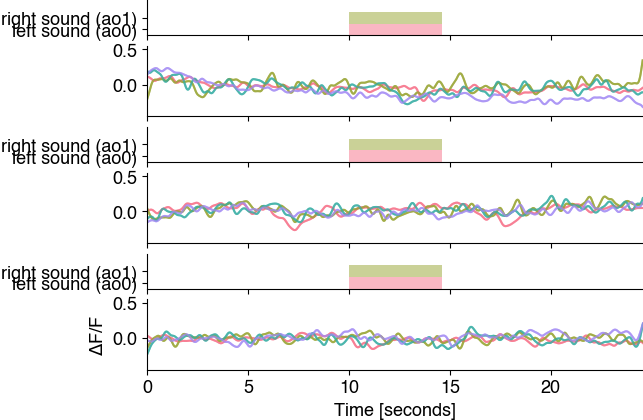

In [10]:
traces_smooth = plot.smooth(traces_dff, sigma=4)

fig, axs = plt.subplots(nrows=s.nb_trials * 2, height_ratios=[1, 2] * s.nb_trials, sharex=True)

all_ylims = []
for trial_number in range(s.nb_trials):
    trace = traces_smooth[trial_number].sel(channel='gcamp')
    stim_info = trace.attrs['stim_info']
    time = traces[trial_number].time

    # STIMULUS
    for stim_cnt, (index, row) in enumerate(stim_info.iterrows()):
        print(index)
        axs[trial_number * 2].fill_between([row['onset_seconds'], row['offset_seconds']],
                                      y1=stim_cnt-0.5, y2=stim_cnt+0.5,
                                      alpha=0.5)
    axs[trial_number * 2].set_yticks(range(len(stim_info.index)), stim_info.index)
    axs[trial_number * 2].set_ylim(-0.5, len(stim_info.index)+0.5)

    # TRACES
    axs[trial_number * 2 + 1].plot(time, trace, alpha=0.67)
    axs[trial_number * 2 + 1].plot(time, trace, alpha=0.67)
    axs[trial_number * 2 + 1].set_xlim(time[0], time[-1])
    all_ylims.extend(axs[trial_number * 2 + 1].get_ylim())
axs[trial_number * 2 + 1].set_xlabel('Time [seconds]')
axs[trial_number * 2 + 1].set_ylabel('$\Delta$F/F')
axs[trial_number * 2 + 1].legend()

[ax.set_ylim(0.9 * min(all_ylims), 1.1 * max(all_ylims)) for ax in axs[1::2]]

# set shared y lims
plt.show()

